In [1]:
import numpy as np
import astropy.units as u
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.io import fits
import matplotlib as mpl
import matplotlib.pyplot as plt

from deproject import deproject, get_galaxy_specs

## Masks

A mask is going to be centered on our galaxy and will turn all of those values in NaN. In this case, the following mask is based on the radius.

In [2]:
galaxy = 'IC5332'
RA, DEC, POSANG, INCL, DIST = get_galaxy_specs(galaxy) # DIST [Mpc]

In [3]:
hdu_galx = fits.open('ic5332_w2_mjysr.fits')[0]

wcs_galx = WCS(hdu_galx.header)
wcs_galx.sip = None

deproj_img = deproject(center_coord=(RA*u.deg, DEC*u.deg), incl=INCL*u.deg, pa=POSANG*u.deg,
                           header=hdu_galx.header, wcs=None, naxis=None, ra=None, dec=None,
                           return_offset=False)
r_deg = deproj_img[0]
r_pc = r_deg * (np.pi / 180) * (DIST * 1e6) # in pc
# data = hdu_galx.data.flatten() * np.cos(INCL*np.pi/180)
# radii = r_pc.flatten()

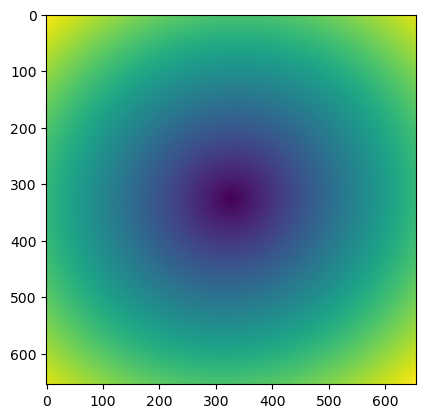

In [4]:
plt.imshow(r_pc)

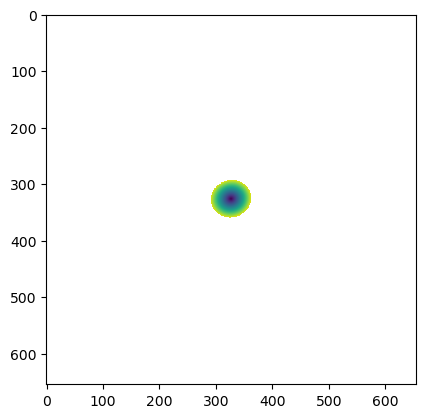

In [5]:
# r_pc = r_deg * (np.pi / 180) * (DIST * 1e6) # in
mask = (r_pc < 5*1e3) 
masked = r_pc.copy()
masked[~mask] = np.nan
plt.imshow(masked)

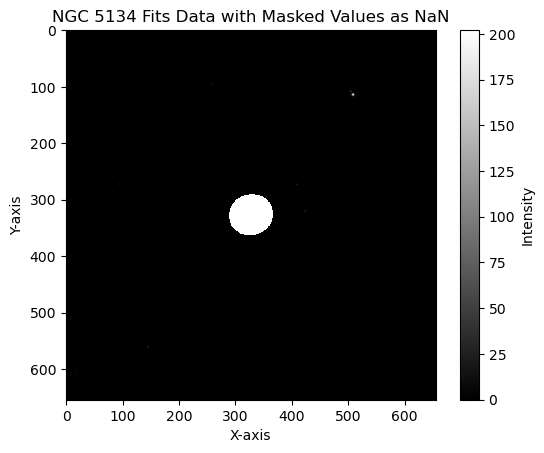

In [6]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

# Load the fits file
fits_file = fits.open('ic5332_w2_mjysr.fits')
data = fits_file[0].data

# Apply the mask to the data and turn covered values into NaN
data[mask] = np.nan

# Plot the masked fits file
plt.imshow(data, cmap='gray')

plt.colorbar(label='Intensity')
plt.title('NGC 5134 Fits Data with Masked Values as NaN')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


## Radial Profile

Radial profiles of our image will show the intesity based on the distance from the center of the image. This will point out background stars and galaxies, as well as give us an idea of how quickly the intensity decreases.

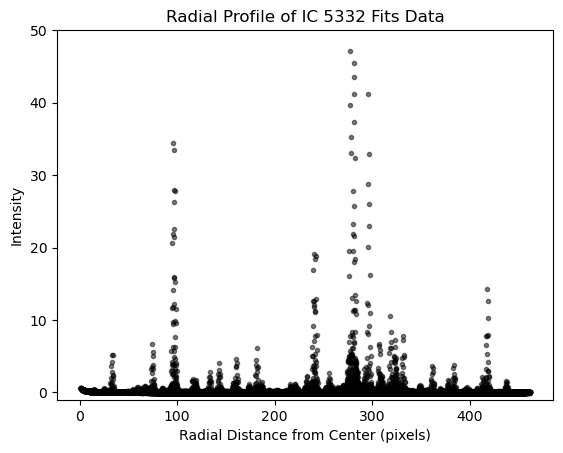

In [7]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

# Load the fits file
fits_file = fits.open('ic5332_w2_mjysr.fits')
data = fits_file[0].data

# Calculate radial distances from the origin (assuming the origin is the center)
y, x = np.indices(data.shape)
center = np.array([(x.max()-x.min())/2, (y.max()-y.min())/2])
r = np.sqrt((x - center[0])**2 + (y - center[1])**2)

# Plot radial profile as scatter plot
plt.scatter(r.flatten(), data.flatten(), marker='.', color='black', alpha=0.5)
plt.xlabel('Radial Distance from Center (pixels)')
plt.ylabel('Intensity')
plt.title('Radial Profile of IC 5332 Fits Data')
plt.ylim(-1,50)
plt.show()


The above plot shows the data with our galaxy.

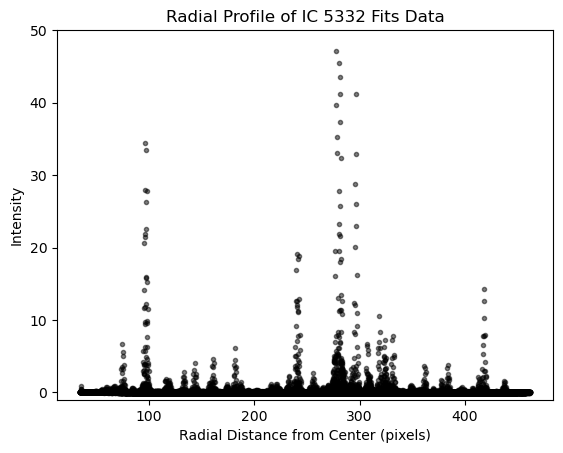

In [8]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

# Load the fits file
fits_file = fits.open('ic5332_w2_mjysr.fits')
data = fits_file[0].data

# Apply the mask to the data and turn covered values into NaN
data[mask] = np.nan

# Calculate radial distances from the origin (assuming the origin is the center)
y, x = np.indices(data.shape)
center = np.array([(x.max() - x.min()) / 2, (y.max() - y.min()) / 2])
r = np.sqrt((x - center[0])**2 + (y - center[1])**2)

# Flatten the arrays and remove NaN values
r_flat = r.flatten()
data_flat = data.flatten()

# Mask NaN values for plotting
valid = ~np.isnan(data_flat)
r_flat_valid = r_flat[valid]
data_flat_valid = data_flat[valid]

# Plot radial profile as scatter plot
plt.scatter(r_flat_valid, data_flat_valid, marker='.', color='black', alpha=0.5)
plt.xlabel('Radial Distance from Center (pixels)')
plt.ylabel('Intensity')
plt.title('Radial Profile of IC 5332 Fits Data')
plt.ylim(-1,50)
plt.show()

# Close the fits file
fits_file.close()


The above plot shows the data without our galaxy

However, in both cases it is difficult to see the data clearly when the intensity is low. So this require a logarithmic scale.

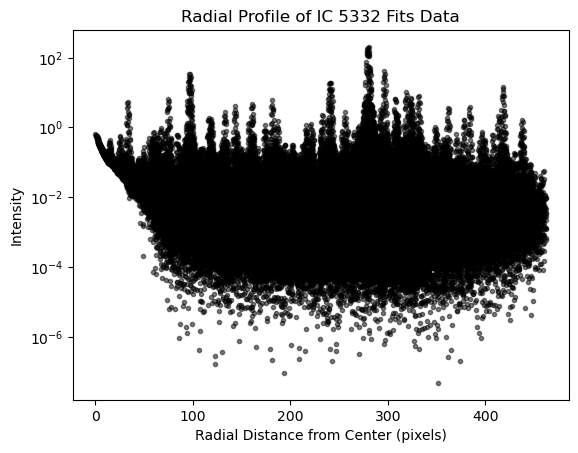

In [12]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

# Load the fits file
fits_file = fits.open('ic5332_w2_mjysr.fits')
data = fits_file[0].data

# Calculate radial distances from the origin (assuming the origin is the center)
y, x = np.indices(data.shape)
center = np.array([(x.max()-x.min())/2, (y.max()-y.min())/2])
r = np.sqrt((x - center[0])**2 + (y - center[1])**2)

# Plot radial profile as scatter plot
plt.scatter(r.flatten(), data.flatten(), marker='.', color='black', alpha=0.5)
plt.xlabel('Radial Distance from Center (pixels)')
plt.ylabel('Intensity')
plt.title('Radial Profile of IC 5332 Fits Data')
plt.yscale('log')
plt.show()


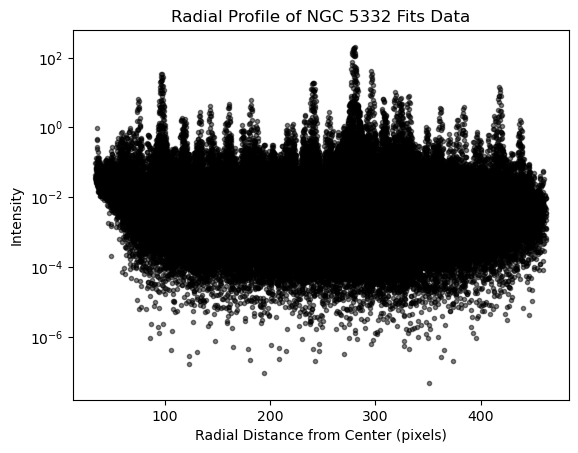

In [10]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

# Load the fits file
fits_file = fits.open('ic5332_w2_mjysr.fits')
data = fits_file[0].data

# Apply the mask to the data and turn covered values into NaN
data[mask] = np.nan

# Calculate radial distances from the origin (assuming the origin is the center)
y, x = np.indices(data.shape)
center = np.array([(x.max() - x.min()) / 2, (y.max() - y.min()) / 2])
r = np.sqrt((x - center[0])**2 + (y - center[1])**2)

# Flatten the arrays and remove NaN values
r_flat = r.flatten()
data_flat = data.flatten()

# Mask NaN values for plotting
valid = ~np.isnan(data_flat)
r_flat_valid = r_flat[valid]
data_flat_valid = data_flat[valid]

# Plot radial profile as scatter plot
plt.scatter(r_flat_valid, data_flat_valid, marker='.', color='black', alpha=0.5)
plt.xlabel('Radial Distance from Center (pixels)')
plt.ylabel('Intensity')
plt.title('Radial Profile of NGC 5332 Fits Data')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.show()

# Close the fits file
fits_file.close()


Now the differences between the masked and unmasked datasets can clearly be seen. The background stars as well as the lower value datapoints can easily be seen. The next step will be to remove the stars and create a line of best fit to the masked dataset. (This will be covered in a separate notebook)